## Code to read the predictions

In [3]:
from src.utils.analysis import LanguageModelAnalyzer, BaselineAnalyzer

In [4]:
# GPT2_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/pred_gpt2_rel"
# BERT_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative/pred_bert_rel"
GLOVE_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative_to_mean/glove_histgrad"
DUMMY_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative_to_mean/dummy"
AVG_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative_to_mean/avg"
WORDAVG_PATH = "/Users/lukas/Desktop/projects/MIT/MIT_prosody/precomputed/predictions/relative_to_mean/wordavg"

In [5]:
# gpt2_analyzer = LanguageModelAnalyzer(GPT2_PATH, batch_analysis=False)
# bert_analyzer = LanguageModelAnalyzer(BERT_PATH, batch_analysis=False)
glove_analyzer = BaselineAnalyzer(GLOVE_PATH)
dummy_analyzer = BaselineAnalyzer(DUMMY_PATH)
avg_analyzer = BaselineAnalyzer(AVG_PATH)
wordavg_analyzer = BaselineAnalyzer(WORDAVG_PATH)

all lengths 4822 90050 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822
all lengths 4822 4822 4822


In [7]:
# gpt2_error = gpt2_analyzer.compute_mse_over_dataset()
# bert_error = bert_analyzer.compute_mse_over_dataset()
print(
    f"\nERROR GLOVE {glove_analyzer.compute_mse_over_dataset()}, \nERROR DUMMY {dummy_analyzer.compute_mse_over_dataset()}, \nERROR AVG {avg_analyzer.compute_mse_over_dataset()}, \nERROR WORDAVG {wordavg_analyzer.compute_mse_over_dataset()}"
)


ERROR GLOVE 0.3622190316261233, 
ERROR DUMMY 1.661877206601064, 
ERROR AVG 0.48748523839166513, 
ERROR WORDAVG 0.47536263437023407


In [23]:
gpt2_stats_per_word = gpt2_analyzer.compute_stats_per_word()
bert_stats_per_word = bert_analyzer.compute_stats_per_word()

### Plot stats over sentence length

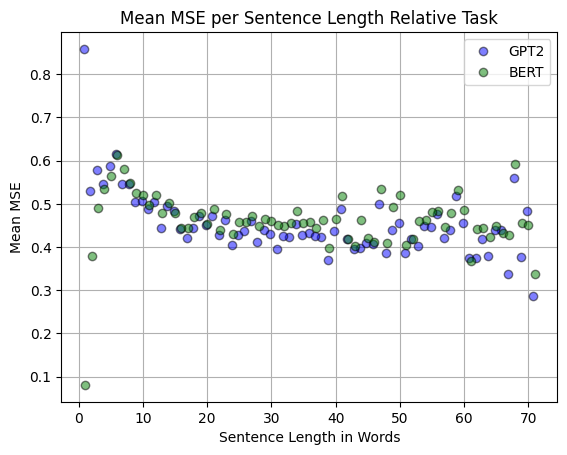

In [18]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [gpt2_analyzer, bert_analyzer],
    ["GPT2", "BERT"],
    mode="sentence_length",
    error_bars=False,
    plot_title="Mean MSE per Sentence Length Relative Task",
    min_samples=1,
)

### Plot stats over word position

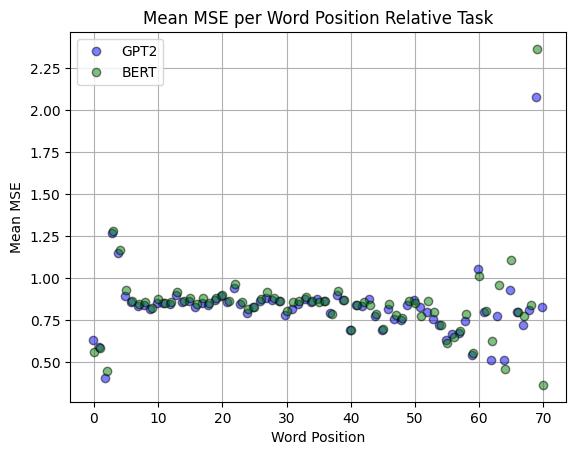

In [19]:
from src.utils.plots import plot_mean_mse

plot_mean_mse(
    [gpt2_analyzer, bert_analyzer],
    ["GPT2", "BERT"],
    mode="word_position",
    error_bars=False,
    plot_title="Mean MSE per Word Position Relative Task",
    min_samples=1,
)

In [20]:
gpt2_stats_per_position = gpt2_analyzer.compute_stats_per_word_position()
bert_stats_per_position = bert_analyzer.compute_stats_per_word_position()

In [21]:
gpt2_stats_per_position

{0: {'mean': 0.6285781951776693, 'std': 1.238137520251869, 'count': 4822},
 1: {'mean': 0.588964865646478, 'std': 1.0607253571336717, 'count': 4741},
 2: {'mean': 0.40181159705855624, 'std': 0.7782441176042856, 'count': 4617},
 3: {'mean': 1.26724515400336, 'std': 1.5930830482535978, 'count': 4484},
 4: {'mean': 1.1508868851137688, 'std': 1.5012184733715939, 'count': 4292},
 5: {'mean': 0.8927121494291651, 'std': 1.3854452231245038, 'count': 4092},
 6: {'mean': 0.8579093329329763, 'std': 1.3751283982291784, 'count': 3871},
 7: {'mean': 0.8338252401298983, 'std': 1.3211623325242277, 'count': 3654},
 8: {'mean': 0.8383240655189715, 'std': 1.2931627149644491, 'count': 3456},
 9: {'mean': 0.8143269164713066, 'std': 1.2279155531459705, 'count': 3281},
 10: {'mean': 0.8493613018132898, 'std': 1.3505512105557202, 'count': 3086},
 11: {'mean': 0.8480156040696321, 'std': 1.2788089114885732, 'count': 2932},
 12: {'mean': 0.8427812980446789, 'std': 1.3279679122614927, 'count': 2764},
 13: {'mean'

### Plot example sentences 

In [55]:
import random

r = random.randint(0, len(gpt2_analyzer))
text = gpt2_analyzer.input_texts[r].split(" ")
labels = gpt2_analyzer.original_labels[r]
gpt2_preds = gpt2_analyzer.get_pred(r)[gpt2_analyzer.get_loss_mask(r) == 1]
bert_preds = bert_analyzer.get_pred(r)[bert_analyzer.get_loss_mask(r) == 1]

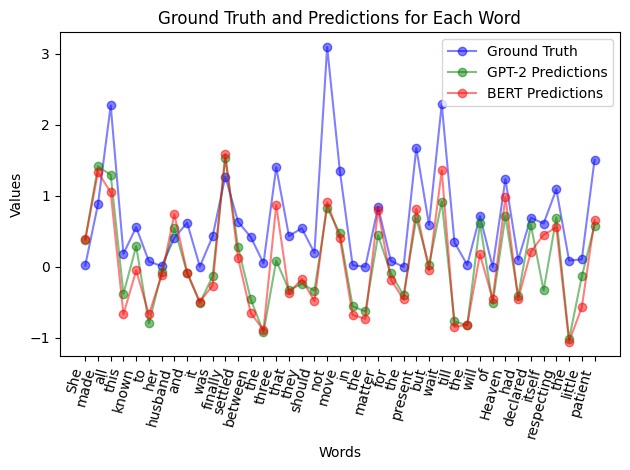

In [56]:
import matplotlib.pyplot as plt
import numpy as np


def plot_ground_truth_and_predictions(text, labels, gpt2_preds, bert_preds):
    assert len(text) == len(labels)
    assert len(labels) == len(gpt2_preds)
    assert len(labels) == len(bert_preds)

    x = np.arange(len(text))

    fig, ax = plt.subplots()
    ax.plot(
        x,
        labels,
        marker="o",
        linestyle="-",
        label="Ground Truth",
        color="blue",
        alpha=0.5,
    )
    ax.plot(
        x,
        gpt2_preds,
        marker="o",
        linestyle="-",
        label="GPT-2 Predictions",
        color="green",
        alpha=0.5,
    )
    ax.plot(
        x,
        bert_preds,
        marker="o",
        linestyle="-",
        label="BERT Predictions",
        color="red",
        alpha=0.5,
    )

    ax.set_xticks(x)
    ax.set_xticklabels(text, rotation=75, ha="right")
    ax.set_xlabel("Words")
    ax.set_ylabel("Values")
    ax.set_title("Ground Truth and Predictions for Each Word")
    ax.legend()

    plt.tight_layout()
    plt.show()


# Usage
plot_ground_truth_and_predictions(text, labels, gpt2_preds, bert_preds)